In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

from RaTag.core.fitting import fit_gaussian_to_histogram, plot_gaussian_fit
%matplotlib inline

# X-ray mean area

The dedicated X-ray run (RUN21) contains 6 batches, each with about 1.5M frames (total ~ 8M frames, the first batch is a bit shorter). 

The pre-acceptance rate is 0.17 -> 1.35 M accepted events.

Most pre-accepted events are single photons with areas below ~ 0.2 mV·µs. Selecting the areas between 0.2 and 8 mV·µs yields:

n = 7400 events, or 5.5‰ (0.5%, factor 0.0055) of the pre-accepted events. The absolute acceptance ratio is 0.00094 (0.094%)

[(0.0, 400.0)]

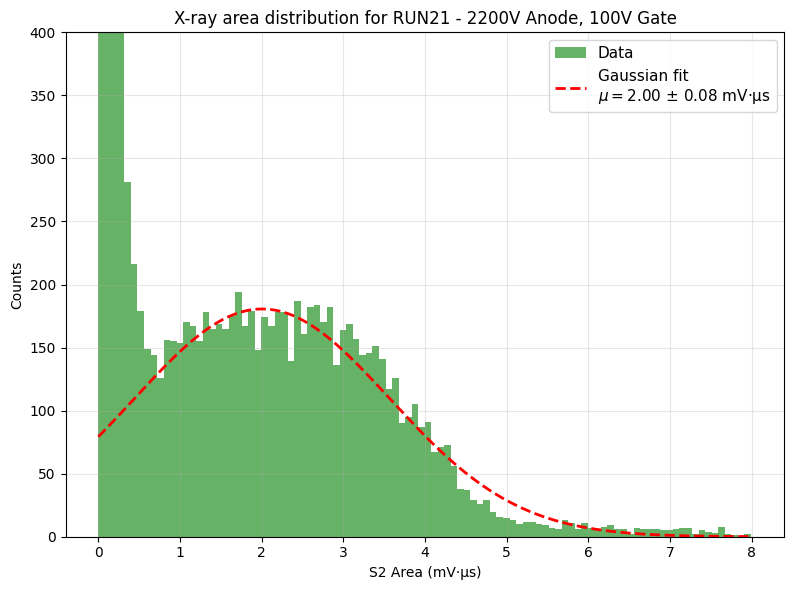

In [31]:
path_areas = '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/RUN_X_xray_areas_combined.npz'
xray_21_file = glob.glob(path_areas)
xac = np.load(xray_21_file[0], allow_pickle=True)['xray_areas']
xrmean, sigma, xrci95, cb, cc, fitres = fit_gaussian_to_histogram(xac, nbins=100, bin_cuts=(0.2, 8), exclude_index=5)
plot_gaussian_fit(data=xac, bin_cuts=(0.0, 8), nbins=100, fit_result=fitres,
                title='X-ray area distribution for RUN21 - 2200V Anode, 100V Gate',
                xlabel='S2 Area (mV·µs)', color='green');
plt.gca().set(ylim=(0, 400))

(np.int64(7402), np.float64(0.0009382313972067943))

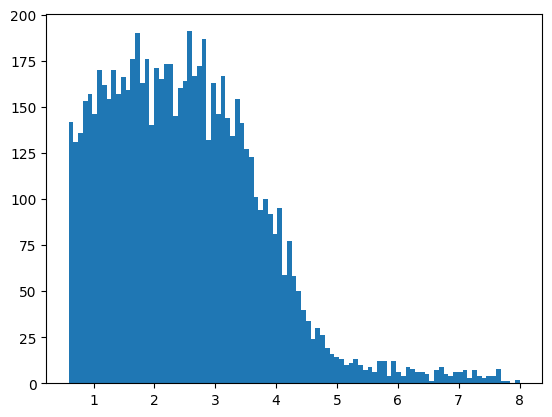

In [39]:
# Plot histogram passed for fit
plt.bar(cb, cc, width=cb[1]-cb[0])
final_accept = sum(cc)
final_accept, final_accept / len(xac) * 0.17

In [42]:
xrmean, xrci95

(np.float64(2.0049951196878424), np.float64(0.07647941752778994))

# Calculate GS2 factor

In [40]:
E_GAMMA = 12300 # eV
Wi = 22 # eV/e-

N_e_gamma = E_GAMMA / Wi  # number of electrons produced by a 12.3 keV X-ray
print(f'Number of electrons produced by a 12.3 keV X-ray: {N_e_gamma:.1f} e-')

Number of electrons produced by a 12.3 keV X-ray: 559.1 e-


In [41]:
print('Mean X-ray area: {:.2f} mV·µs'.format(xrmean))

Mean X-ray area: 2.00 mV·µs


In [44]:
gs2_factor = (xrmean / N_e_gamma)
print('GS2 factor: {:.5f} mV·µs / e-'.format(gs2_factor))

GS2 factor: 0.00359 mV·µs / e-


# Example normalization for Ra224 recoils

In [ ]:
m_alpha = 4 # amu
m_Th228 = 228 # amu
Q_decay = 5520.15 # keV
E_alpha = 5423.15 # keV
E_Ra224 = Q_decay * (m_alpha / m_Th228)  # keV
print('Recoil energy of Ra224 alpha decay: {:.1f} keV'.format(E_Ra224))

Recoil energy of Ra224 alpha decay: 96.8 keV


In [55]:
m_alpha = 4 # amu
m_Ra224 = 224 # amu
Q_decay_Ra = 5788.87 # keV
E_Rn220 = Q_decay_Ra * (m_alpha / m_Ra224)
print('Recoil energy of Rn220 alpha decay: {:.1f} keV'.format(E_Rn220))

Recoil energy of Rn220 alpha decay: 103.4 keV


In [59]:
N_expected_electrons_Ra224 = E_Ra224 * 1e3 / Wi
print('Expected number of electrons from Ra224 recoils: {:.1f} e-'.format(N_expected_electrons_Ra224))

Expected number of electrons from Ra224 recoils: 4402.0 e-


In [69]:
A_recoil = 1.7 # mV·µs (Example measured recoil area at 71 V/cm)
N_measured_electrons_Ra224 = A_recoil / gs2_factor
print('Measured number of electrons from Ra224 recoils: {:.1f} e-'.format(N_measured_electrons_Ra224))

Measured number of electrons from Ra224 recoils: 474.0 e-


In [70]:
recomb_factor = 1 - (N_measured_electrons_Ra224 / N_expected_electrons_Ra224)
print('Recombination factor for Ra224 recoils at 71 V/cm: {:.3f}'.format(recomb_factor))

Recombination factor for Ra224 recoils at 71 V/cm: 0.892
